In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series , DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score

In [2]:
data = pd.read_csv('C:/Users\hp\Downloads\Heart Disease.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

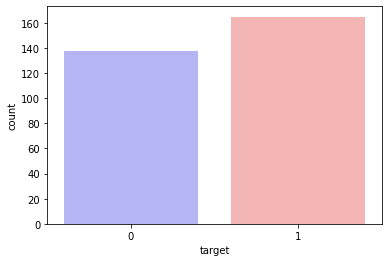

In [5]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])

In [7]:
print("no Heart Disease %: {:.2f}%".format((countNoDisease / (len(data.target))*100)))

no Heart Disease %: 45.54%


In [8]:
print("no Heart Disease %: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

no Heart Disease %: 54.46%


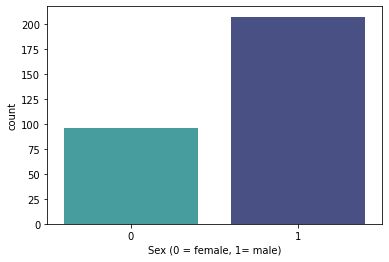

In [9]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [10]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])

In [11]:
print("countFemale %: {:.2f}%".format((countFemale / (len(data.target))*100)))

countFemale %: 31.68%


In [12]:
print("countMale %: {:.2f}%".format((countMale / (len(data.target))*100)))

countMale %: 68.32%


In [13]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


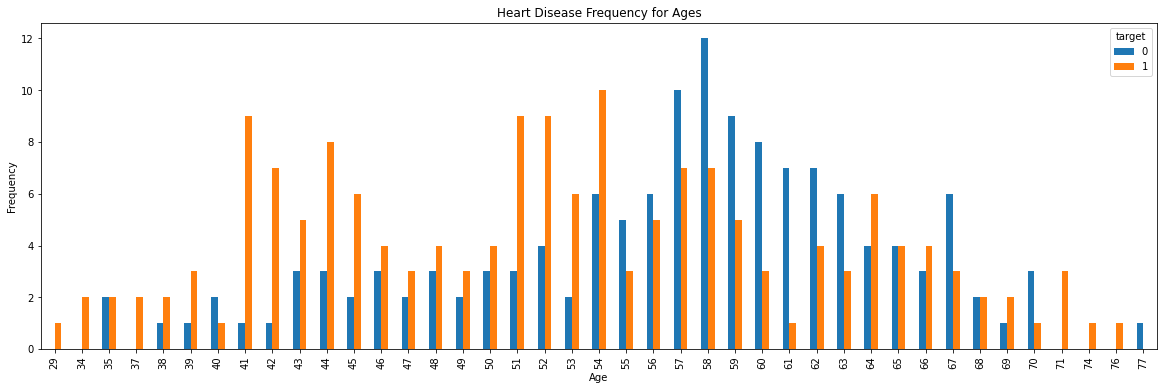

In [14]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

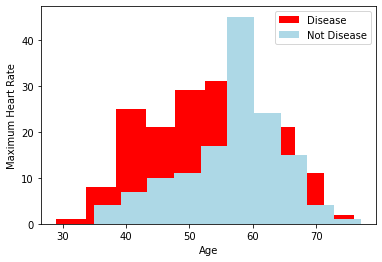

In [15]:
plt.hist(x=data.age[data.target==1],  color ="red")
plt.hist(x=data.age[data.target==0],  color ="lightblue")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [16]:
pd.crosstab(data.sex,data.target)

target,0,1
sex,,
0,24,72
1,114,93


In [17]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp', ylabel='target'>

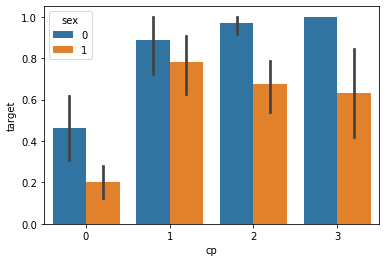

In [18]:
sns.barplot(x = data.cp, y = data.target, hue = data.sex)

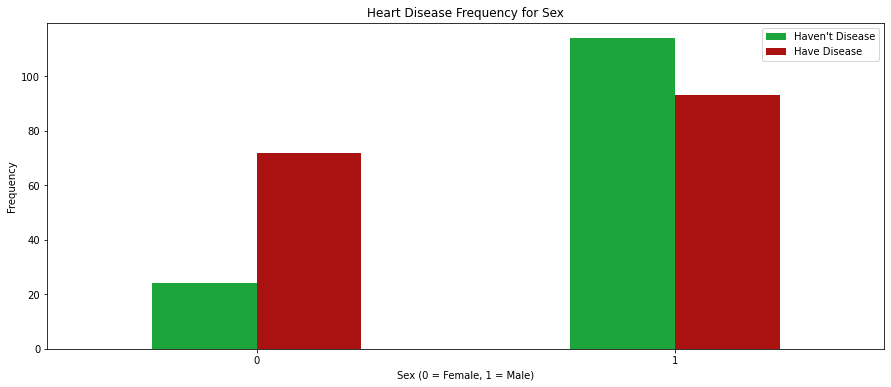

In [19]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

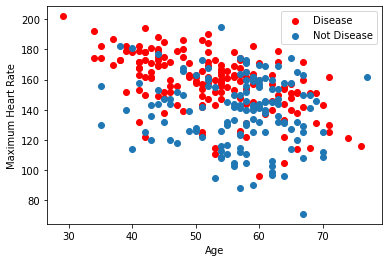

In [20]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

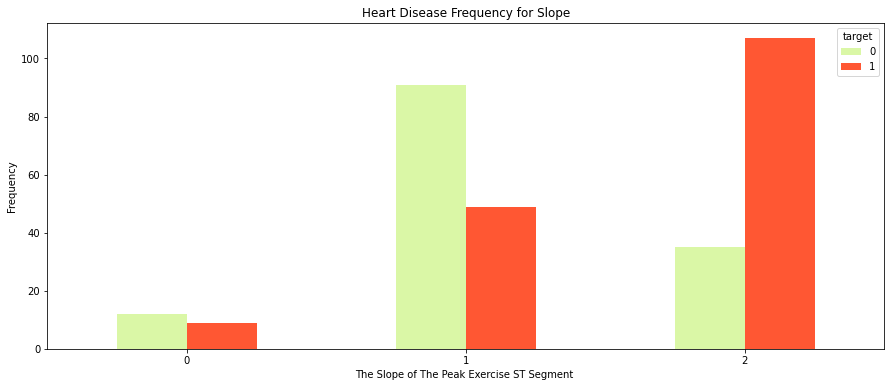

In [21]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

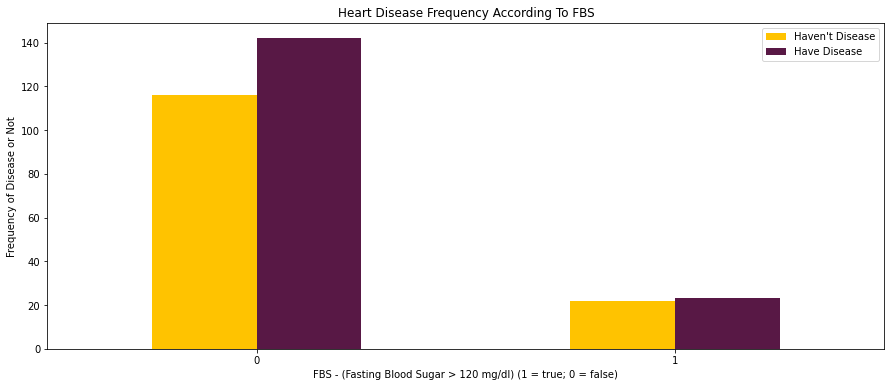

In [22]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

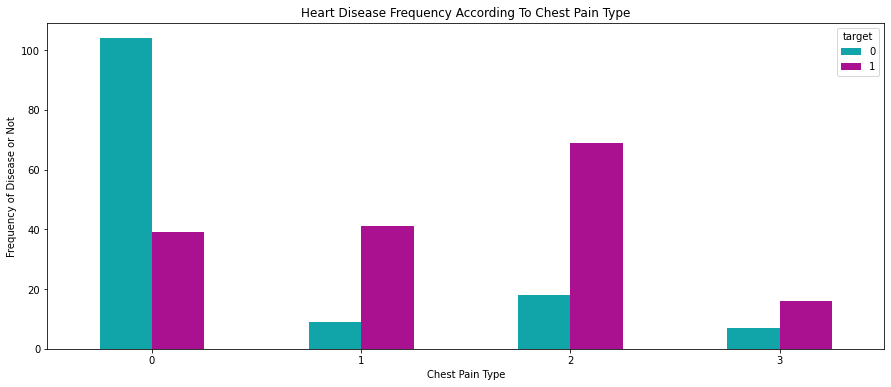

In [23]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [24]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

a = pd.get_dummies(data['cp'], prefix = "cp") = This line creates dummy variables for the cp Col. in the data frame. The prefix = 'cp' this parameter adds the prefix cp to the col names of the resulting dummy variables. The cp column likly contains categorical data with different levels of categories and this line creates binary columns for each unique category present in the cp column.

In [26]:
a

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [27]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [28]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
x_data = data.drop(['target'], axis = 1)

In [30]:
y = data.target.values


In [31]:
x_data


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,0,0,0,0,0,0,1,0,1,0


In [32]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [34]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


x - x(min) / x(max)-x(min)
attempt to convert your data to normal dist

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [36]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

lr.fit(x_train,y_train) = This line fits the logistic regression model to the training data.
acc = lr.score(x_test,y_test)*100 = after fitting the model this line calcultes the accuracy of the logistic regression model on the test data. The score() method of the logistic regression class calculates the accuracy of the model on the given test data. THe accuracy is then multiply by 100 to convert it into a percentage.

In [37]:
accuracies = {}

In [38]:
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 82.89%


### Desicion Tree:
It is a widly used machine larning algorithm for both classification (or categorical) and regression tasks. Its a non linear model the recursively partitions the input data into subsets based on different features creating a tree like structure. Here the basic idea is to split the data at each node based on a certain feature and its throshold in a way that the subset produced become increasing homogenious in terms of target variables (for classification) and (for regression), we reduce the variance. The process is repeated recursively until a stoping criterion is met (such as reaching a max. depth, min. no. of samples in a leaf,imurity threshhold (for classification)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
acc = dtc.score(x_test, y_test)*100

In [41]:
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.63%


In [43]:
from sklearn import tree

In [47]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1,max_depth=2)
dt2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

The random_state parameter is used to set the random seed for reproducibility of results.
it ensures that the results remains the same each time we run the code with the same data and hyper parameters.

Max_depth = The max_depth parameter sets the maximum depth of the tree. It limits the number of levels in the tree, preventing it from becoming too deep and potentially overfitting the training data.
Setting it to 2 means that the tree will have a maxmum depth of 2 levels making it a shallow tree.

this line fitts the dicision tree model to the training data. the variable dt2 will hold the trained dicision tree classifier with a maximum depth of 2. We can use this calssifier to make predictions on new data or evaluate its performaance on test data set. Below we are evaluating the perfomance based on test data set and testing score turns out to be 73.68%.

It is to be noted that setting a maximum depth of 2 has resulted in a simple and shallow decision tree which might not capture complex patter of the data set could we use full when dealling with small data set or when we want a more interpretable model. for more complex data and pattern we might need to consider a higher max depth value or use other hyper-parameters tuning techniques

In [48]:
dt2_score_train = dt2.score(x_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(x_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.801762114537445
Testing score:  0.7368421052631579


In [49]:
# Decision tree with depth = 2
dt3 = tree.DecisionTreeClassifier(random_state=1,max_depth=3)
dt3.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [50]:
dt3_score_train = dt3.score(x_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(x_test, y_test) # we can see training score is increasing more and more tending to over fitting, at the cost of improvement of testing score.
print("Testing score: ",dt3_score_test)

# we can see training score is increasing more and more tending to over fitting, at the cost of improvement of testing score.

Training score:  0.8502202643171806
Testing score:  0.7894736842105263


In [51]:
# Decision tree with depth = 2
dt4 = tree.DecisionTreeClassifier(random_state=1,max_depth=4)
dt4.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [52]:
dt4_score_train = dt4.score(x_train, y_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(x_test, y_test)
print("Testing score: ",dt4_score_test)

Training score:  0.8942731277533039
Testing score:  0.7894736842105263


In [53]:
# Decision tree with depth = 2
dt6 = tree.DecisionTreeClassifier(random_state=1,max_depth=6)
dt6.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [54]:
dt6_score_train = dt6.score(x_train, y_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(x_test, y_test)
print("Testing score: ",dt6_score_test)

Training score:  0.9559471365638766
Testing score:  0.7631578947368421


In [55]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train, y_train)
dt1_score_train = dt1.score(x_train, y_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(x_test, y_test)
print("Testing score: ", dt1_score_test)
#overfit model

Training score:  1.0
Testing score:  0.7631578947368421


In [57]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2         0.801762114537445   0.7368421052631579
3        0.8502202643171806   0.7894736842105263
4        0.8942731277533039   0.7894736842105263
6        0.9559471365638766   0.7631578947368421
max                     1.0   0.7631578947368421


It could be seen that the higher the depth the training score increases and matches perfectly with the training data set. However, the higher the depth the tree goes it overfits to the training data set. So, its of no use to keep on incresing the tree depth. According to above observation tree witha depth of 2 seems more resonable as both training and testing score are resonably high.

{:1} - formates the depth (first value in each row) with one character width (left alligned by default)

the first 2 lines of the code is printing the header row and line of dashes to seprate the headers from the data

{:>25} - formates the training score with 25 character width (right alligned).

overall it creates a table like repersentation of the data to show the training and testing score for different depths of a decision tree model. It is a useful way to compare the model performance for different hyperparameters setting (in this case different depths).

# Ramdom Forest

it is an ensemble learning method used for both classification and regression tasks, that combines the predictions of multiple individuls decision trees to improve overall accuracy and robustance. Step wise direction of how random forest algorithm works.

1) data prepration: we will prepare the data set with input features and coresponding target lables (training data and testing data)

2) Bootstrapped samping: it uses techniqes Bootstrapped samping to create multiple training dataset. It randomly selects subsets with replacement from the original training data, allowing some samples to appare multiple times while others may not be selected at all. THis process creates diverse traininng sets for each tree.

3) Decision tree construction: for each bootstrapped samples a decision tree is biult by selecting the best freature to split the data at each note. THe best feature is choose based on criterion such as GINI IMPURITY (for classifiation) or mean sq. error (for reggression).

4) Emsemble creation: After connstructing multiple decision trees the algorithm creates an emsemble by combining their prediction. FOr classification task the most common class predicited by all trees (MOde) is chosen as the final prediction. For reggression tasks the average of all indiviaual tree predicion is taken as the final prediction.

5) Random feature selection - While constructing decision trees random forest introduces an addition level of randomness by selecting only a random subset of features at each split. this process helps in creating diverse and less corelated trees leading to improved generalisations.

THe advantages of random forest are:
HIgh accuracy - Randome forest often provides better predictive perfomance compare to a single decision tree.

RObustness - It is less prone to overfitting bcz of the emsemble approce and randomness introdued during tree construction.

Varsatality - it can handle both categorical and numberic features and its aplicable to wode range of tasks inclusding classification and reggression.

However Random forest have some drawbacks such as being less interpretable then individual decision trees and potnetially requiring more memory and computation due to the emsemble of trees.

In [58]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

In [59]:
accuracies = {}
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 82.89%


In [60]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

In [62]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.84%


In [63]:
rf = RandomForestClassifier(n_estimators = 5000, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=1)

In [64]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.84%


In [67]:
rf = RandomForestClassifier(n_estimators = 50000, random_state = 1)
rf.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

In [69]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8816


In [70]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8553


In [71]:
rfc = RandomForestClassifier(n_estimators=300, random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8553


In [72]:
rfc.feature_importances_

array([0.07378216, 0.042805  , 0.06875332, 0.07330342, 0.0097366 ,
       0.01882004, 0.10933938, 0.05457943, 0.09381765, 0.10349217,
       0.096348  , 0.0115697 , 0.01893876, 0.01203891, 0.00154219,
       0.0067146 , 0.09747402, 0.05549638, 0.0049238 , 0.02294746,
       0.023577  ])

In [74]:
feature_scores = pd.Series(rfc.feature_importances_, 
                           index=x_train.columns).sort_values(ascending=False)
feature_scores

thalach     0.109339
ca          0.103492
thal_2      0.097474
cp_0        0.096348
oldpeak     0.093818
age         0.073782
chol        0.073303
trestbps    0.068753
thal_3      0.055496
exang       0.054579
sex         0.042805
slope_2     0.023577
slope_1     0.022947
cp_2        0.018939
restecg     0.018820
cp_3        0.012039
cp_1        0.011570
fbs         0.009737
thal_1      0.006715
slope_0     0.004924
thal_0      0.001542
dtype: float64

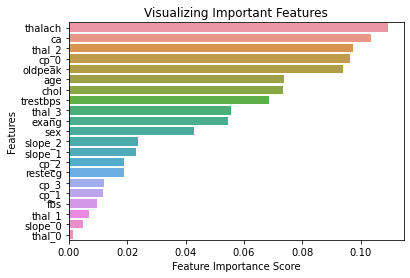

In [75]:
import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

feature_scores = pd.Series(rfc.feature_importances_, 
                           index=x_train.columns).sort_values(ascending=False)
                           
THis line is used to compute the feature importance of the feature in the dataset after training a random forest classifier (rfc). feature importances indicate the relative imporance of each feature in making the predictions with the trained model.

rfc.feature_importances_ : This atribute of the random forest classifer object rfc contains an array of feature importances computed during the training process. each element of this arry represents the importance of the corresponding feature in the input data. THe larger the value the more importanct the feature is in making prediction. We can use this infomation to idetify the most important feature in the data and focus on them during data analysis or model interpretation.